# Reinforcement Learning: Upper Confidence Bound (UCB)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Import dataset

In [7]:
#in a real world environment we would not have this simulation dataset.
dataset = pd.read_csv('../Ads_CTR_Optimisation.csv')

## Implement UCB

In [8]:
#Step 1
N = 1000 #total number of users, #try 500, 1000, or 10,000
d = 10 #total number of ads
ads_selected = []
Ni_n_numbers_of_selections = [0] * d #initialise with 10 zeros
Ri_n_sum_of_rewards = [0] * d #initialise with 10 zeros
total_reward = 0 #total reward over all rounds

#Step 2
for n in range(0, N): #loop through all rounds (10k)
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if(Ni_n_numbers_of_selections[i] > 0):
            ri_bar_n_average_reward = Ri_n_sum_of_rewards[i] / Ni_n_numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / Ni_n_numbers_of_selections[i])
            upper_bound = ri_bar_n_average_reward + delta_i
#step 3
        else:
            upper_bound = 1e400 #we need a high value
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    Ni_n_numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    Ri_n_sum_of_rewards[ad] = Ri_n_sum_of_rewards[ad] + reward
    total_reward += reward

## Visualise the results

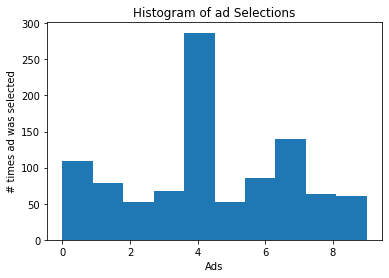

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ad Selections')
plt.xlabel('Ads')
plt.ylabel('# times ad was selected')
plt.show()

500 is not enough to identify that ad 4 was the best one to run